In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk 
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve
import joblib

ModuleNotFoundError: No module named 'matplotlib'

In [161]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/goodisoft/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/goodisoft/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/goodisoft/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [162]:
df = pd.read_csv('./data/spam.csv', encoding='latin-1')

In [163]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [164]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [165]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [166]:
df.shape

(5572, 2)

In [167]:
df['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [168]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='v1'>

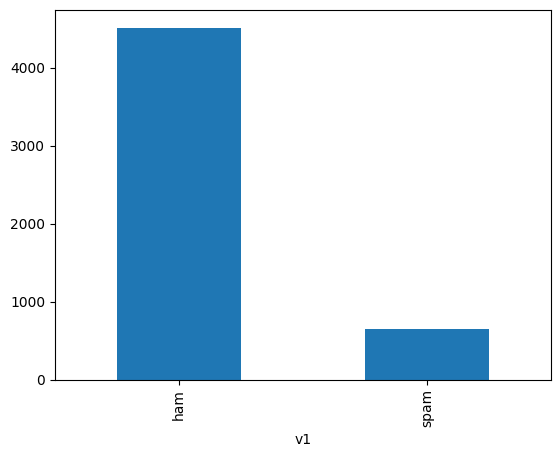

In [169]:
df['v1'].value_counts().plot.bar()

### Count word

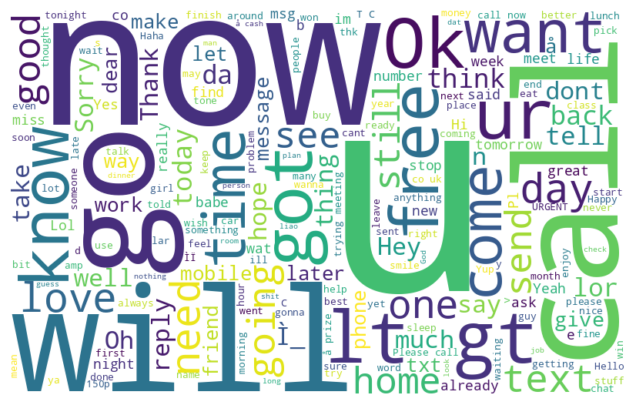

In [170]:
text=' '.join(df['v2'])
wordcloud=WordCloud(width=800,height=500,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Data Preprocessing

In [171]:
def lowerChange(text):
    return text.lower() 

In [172]:
df['v2']=df['v2'].apply(lowerChange)
df['v2']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: v2, Length: 5169, dtype: object

In [173]:
def Preprocess(text):
    #Remove punctations & numbers
    text=re.sub(r"[^a-zA-Z]", " ", text)
    
    #tokenize sentence into words 
    words=word_tokenize(text)
    
    #Remove stopwords
    stop_words=set(stopwords.words("english"))
    words=[word for word in words if word not in stop_words]
    
    return words
    

In [174]:

df['txt'] = df['v2'].apply(Preprocess)
df.head(10)


,v1,v2,txt
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]"
5,spam,freemsg hey there darling it's been 3 week's n...,"[freemsg, hey, darling, week, word, back, like..."
6,ham,even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aids..."
7,ham,as per your request 'melle melle (oru minnamin...,"[per, request, melle, melle, oru, minnaminungi..."
8,spam,winner!! as a valued network customer you have...,"[winner, valued, network, customer, selected, ..."
9,spam,had your mobile 11 months or more? u r entitle...,"[mobile, months, u, r, entitled, update, lates..."


In [175]:
df.drop('v2',axis=1,inplace=True)

In [176]:
df['v1']=df['v1'].str.replace('ham','0').str.replace('spam','1').astype(int)

#### Word cloud of non spam

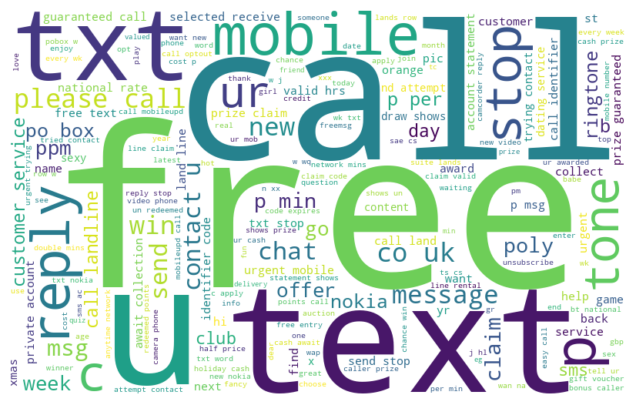

In [177]:
df_1=df[df['v1']==1]

df_1 = df[df['v1'] == 1]
text = ' '.join([' '.join(tokens) for tokens in df_1['txt']])  # Join the lists of tokens into a single string

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Word cloud of spam

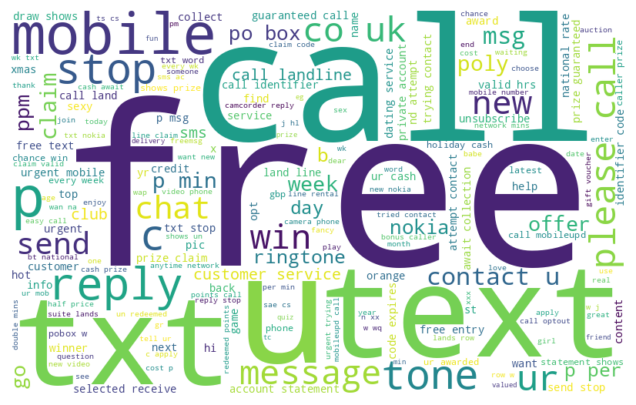

In [178]:
df_1=df[df['v1']==0]

df_1 = df[df['v1'] == 1]
text = ' '.join([' '.join(tokens) for tokens in df_1['txt']])  # Join the lists of tokens into a single string

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Spam - 1, Non spam - 0

In [179]:
df.head()

,v1,txt
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, think, goes, usf, lives, around, though]"


In [180]:
countvector = CountVectorizer()
sentence_as_x = [' '.join(tokens) for tokens in df['txt']]

In [181]:
X = countvector.fit_transform(sentence_as_x)

#### Split the data into training and testing

In [182]:
y = df['v1']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [183]:
X_train = X_train.toarray()
X_test = X_test.toarray()

#### Creating Model

In [184]:
#GaussianNb
gaussNB = GaussianNB()
gaussNB.fit(X_train,y_train)

#MultinomialNB
multiNB = MultinomialNB()
multiNB.fit(X_train,y_train)

MultinomialNB()

In [185]:
gaussNBPre = gaussNB.predict(X_test)
multiNBPre = multiNB.predict(X_test)

In [186]:
print("From Gaussian model",accuracy_score(y_test,gaussNBPre))
print("From Multinomial model",accuracy_score(y_test,multiNBPre))

From Gaussian model 0.8781431334622823
From Multinomial model 0.971953578336557


In [195]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, multiNBPre)

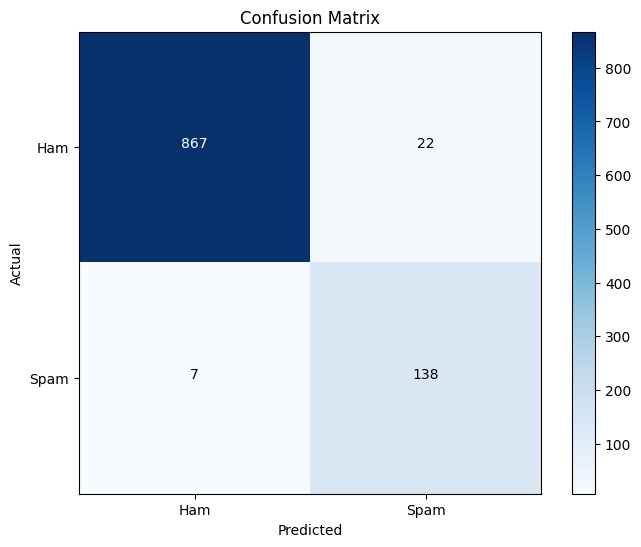

In [197]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Ham', 'Spam'])
plt.yticks(tick_marks, ['Ham', 'Spam'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

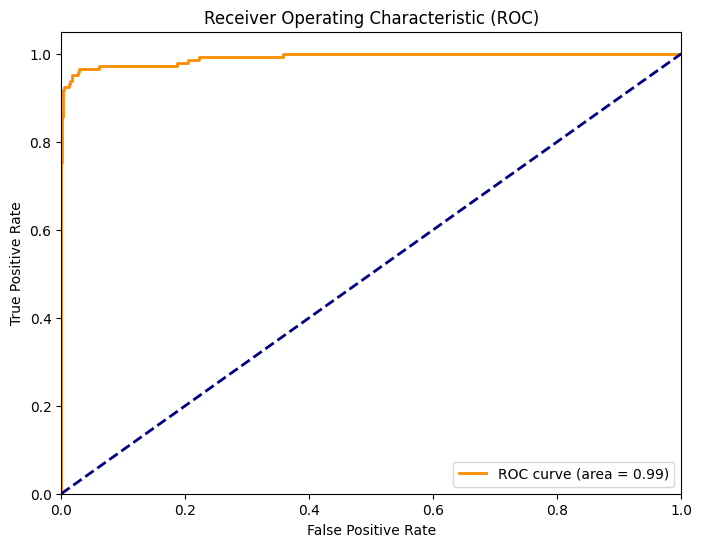

In [201]:

y_probs = multiNB.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Save Model

In [187]:
joblib.dump(countvector, './trainedModels/email_vectorizer.pkl')
joblib.dump(multiNB, './trainedModels/classifier_model.pkl')

['./trainedModels/classifier_model.pkl']

#### Test the model with real email

In [188]:
new_email = "You've won a prize! Click here to claim your reward."

#### Preprocess the email text

In [189]:
processed_email = Preprocess(new_email)

#### Load the model and vectorizer

In [190]:
load_classifier = joblib.load('./trainedModels/classifier_model.pkl')
load_vectorizer = joblib.load('./trainedModels/vectorizer.pkl')

In [191]:
type(load_classifier)

sklearn.naive_bayes.MultinomialNB

In [192]:
vc_email = load_vectorizer.transform(processed_email)

In [193]:
prediction = load_classifier.predict(vc_email)

In [194]:
prediction[0]

0